In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/kaggle/input/hate-speech-labeled/processed_data.xlsx')
df

,date_created,specific_resource_type,from_username,content,final_sentiment,followers,freq_tweets,profile_link
0,2024-04-12 08:48:00,twitter,Ayudihutankecil,Jika pemilu curang dilakukan oleh orang-orang ...,negative,641,11,https://twitter.com/Ayudihutankecil
1,2024-04-04 16:47:00,twitter,tribunkaltim,Terjawab Nasib Wacana Hak Angket Kecurangan Pe...,neutral,32682,23,https://twitter.com/tribunkaltim
2,2024-04-04 14:05:00,twitter,monitorind,Ketua DPR RI yang juga Ketua DPP PDI Perjuanga...,negative,569,3,https://twitter.com/monitorind
3,2024-05-11 10:07:00,twitter,YufrienA,@OfficialDPP_PBB Dunia yg sebentar diraih deng...,negative,26,3,https://twitter.com/YufrienA
4,2024-05-11 05:01:00,twitter,rpatriantobsc,@e100ss Kurangi resiko urban problem dgn opera...,negative,17,1,https://twitter.com/rpatriantobsc
...,...,...,...,...,...,...,...,...
62338,2024-03-08 03:06:00,twitter,MarahIchsan,"JAKARTA, https://t.co/5AMWgtEmD9 - Dewan Perwa...",neutral,18175,24,https://twitter.com/MarahIchsan
62339,2024-03-08 02:58:00,twitter,lucky_jannah,@mharisman @pekatgulita @makelarcapres @HMJUSU...,negative,917,4,https://twitter.com/lucky_jannah
62340,2024-03-08 02:57:00,twitter,Junaidi11132,@cuitcuap_ Kita selalu berdiri diatas kebenara...,negative,6,2,https://twitter.com/Junaidi11132
62341,2024-03-08 02:51:00,twitter,mengudarabebas,@brother_djon Setuju aja masyarakat kalo pemil...,negative,2,14,https://twitter.com/mengudarabebas


In [3]:
df['final_sentiment'].value_counts()

final_sentiment
negative    41249
neutral     17249
positive     3845
Name: count, dtype: int64

as we can see there are 3 types of final sentiment, which are:

1. negative
2. neutral
3. positive

since our task is to classify whether the content of a tweet is a hate speech or not, we will divide the final_sentiment to only two types, which are : 

1. negative (1)
2. non-negative (0)

and for this hate speech classification task, we will only need two features from the dataframe, which are:

1. content
2. final_sentiment

In [4]:
df = df[['final_sentiment', 'content']]
df

,final_sentiment,content
0,negative,Jika pemilu curang dilakukan oleh orang-orang ...
1,neutral,Terjawab Nasib Wacana Hak Angket Kecurangan Pe...
2,negative,Ketua DPR RI yang juga Ketua DPP PDI Perjuanga...
3,negative,@OfficialDPP_PBB Dunia yg sebentar diraih deng...
4,negative,@e100ss Kurangi resiko urban problem dgn opera...
...,...,...
62338,neutral,"JAKARTA, https://t.co/5AMWgtEmD9 - Dewan Perwa..."
62339,negative,@mharisman @pekatgulita @makelarcapres @HMJUSU...
62340,negative,@cuitcuap_ Kita selalu berdiri diatas kebenara...
62341,negative,@brother_djon Setuju aja masyarakat kalo pemil...


## DATA PREPROCESSING

### FUNCTIONS CREATING

In [5]:
import re

def filter_final_sentiment(df: pd.DataFrame):
    df = df.copy()

    df.loc[df['final_sentiment'] != 'negative', 'final_sentiment'] = 0
    df.loc[df['final_sentiment'] == 'negative', 'final_sentiment'] = 1

    df['final_sentiment'] = df['final_sentiment'].astype(int)

    return df


def drop_invalid_content(df: pd.DataFrame):
    df = df.copy()
    df = df.dropna()
    return df

def text_preprocessing(df: pd.DataFrame):
    cleaned_tweet = []
    df = df.copy()
    for content in df['content']:
        # remove mentions and urls
        content = re.sub(r"(?:\@|https?\://)\S+", "", content)
        # remove any remaining urls
        content = re.sub(r"http\S+", "", content)
        # replace newline with characters with spaces
        content = re.sub('\n', ' ', content)
        # remove 'RT' (retweet)
        content = re.sub('RT', '', content)
        # remove all chars except letters and apostrophes
        content = re.sub("[^a-zA-Z^]", " ", content)
        # replace multiple spaces with a single space
        content = re.sub(r'\s+', ' ', content)
        # remove leading and trailing whitespace
        content = content.strip()
        # convert to lower case
        content = content.lower()
        cleaned_tweet.append(content)
    
    # Assign cleaned tweets back to DataFrame
    df['content'] = cleaned_tweet
    return df

def replace_slang(text, slang_dict):
    # Split the text into words
    words = text.split()

    # Replace slang words if they exist in the dictionary
    cleaned_words = [slang_dict.get(word.lower(), word) for word in words]

    # Join the words back into a sentence
    return ' '.join(cleaned_words)

### ENCODE FINAL SENTIMENT

In [6]:
df = filter_final_sentiment(df)
df

,final_sentiment,content
0,1,Jika pemilu curang dilakukan oleh orang-orang ...
1,0,Terjawab Nasib Wacana Hak Angket Kecurangan Pe...
2,1,Ketua DPR RI yang juga Ketua DPP PDI Perjuanga...
3,1,@OfficialDPP_PBB Dunia yg sebentar diraih deng...
4,1,@e100ss Kurangi resiko urban problem dgn opera...
...,...,...
62338,0,"JAKARTA, https://t.co/5AMWgtEmD9 - Dewan Perwa..."
62339,1,@mharisman @pekatgulita @makelarcapres @HMJUSU...
62340,1,@cuitcuap_ Kita selalu berdiri diatas kebenara...
62341,1,@brother_djon Setuju aja masyarakat kalo pemil...


In [7]:
df['final_sentiment'].value_counts()

final_sentiment
1    41249
0    21094
Name: count, dtype: int64

### DROP INVALID VALUES

In [8]:
df = drop_invalid_content(df)
df

,final_sentiment,content
0,1,Jika pemilu curang dilakukan oleh orang-orang ...
1,0,Terjawab Nasib Wacana Hak Angket Kecurangan Pe...
2,1,Ketua DPR RI yang juga Ketua DPP PDI Perjuanga...
3,1,@OfficialDPP_PBB Dunia yg sebentar diraih deng...
4,1,@e100ss Kurangi resiko urban problem dgn opera...
...,...,...
62338,0,"JAKARTA, https://t.co/5AMWgtEmD9 - Dewan Perwa..."
62339,1,@mharisman @pekatgulita @makelarcapres @HMJUSU...
62340,1,@cuitcuap_ Kita selalu berdiri diatas kebenara...
62341,1,@brother_djon Setuju aja masyarakat kalo pemil...


In [9]:
df.isna().value_counts()

final_sentiment  content
False            False      62341
Name: count, dtype: int64

### Text Preprocessing

In [10]:
df = text_preprocessing(df)
df

,final_sentiment,content
0,1,jika pemilu curang dilakukan oleh orang orang ...
1,0,terjawab nasib wacana hak angket kecurangan pe...
2,1,ketua dpr ri yang juga ketua dpp pdi perjuanga...
3,1,dunia yg sebentar diraih dengan kecurangan akh...
4,1,kurangi resiko urban problem dgn operasi kepen...
...,...,...
62338,0,jakaa dewan perwakilan daerah dpd ri telah sep...
62339,1,ya sdh bandingkan sja lbh gila dan lbh bangsat...
62340,1,kita selalu berdiri diatas kebenaran dan kejuj...
62341,1,setuju aja masyarakat kalo pemilu diulang tapi...


### SLANG WORDS REMOVAL

In [11]:
import json

with open('/kaggle/input/slang-words-json/slang_words.json', 'r') as file:
    slang_words = json.load(file)

In [12]:
df['content'] = df['content'].apply(lambda x : replace_slang(x, slang_words))
df

,final_sentiment,content
0,1,jika pemilu curang dilakukan oleh orang orang ...
1,0,terjawab nasib wacana hak angket kecurangan pe...
2,1,ketua dpr ri yang juga ketua dpp pdi perjuanga...
3,1,dunia yang sebentar diraih dengan kecurangan a...
4,1,kurangi resiko urban masalah dengan operasi ke...
...,...,...
62338,0,jakaa dewan perwakilan daerah dpd ri telah sep...
62339,1,iya sdh bandingkan sja lbh gila dan lbh bangsa...
62340,1,kita selalu berdiri diatas kebenaran dan kejuj...
62341,1,setuju saja masyarakat kalau pemilu diulang ta...


## DATA MODELLING

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/234k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

### Pytorch Dataset Class Creation

In [14]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

### Define compute_metrics function

In [15]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

### Convert data

In [16]:
from sklearn.model_selection import train_test_split
X = df['content']
y = df['final_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=512)

label_dict = {label: i for i, label in enumerate(y.unique())}
y_train_encoded = y_train.map(label_dict)
y_test_encoded = y_test.map(label_dict)

In [17]:
train_dataset = Dataset(train_encodings, y_train_encoded.tolist())
test_dataset = Dataset(test_encodings, y_test_encoded.tolist())

### Model Initialization

In [18]:
    model = AutoModelForSequenceClassification.from_pretrained(
        "indolem/indobert-base-uncased",
        num_labels=len(label_dict)
    )

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
model = model.cuda()

In [20]:
training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=4,
        per_device_train_batch_size=32,
        per_device_eval_batch_size=64,
        warmup_steps=500,
        weight_decay=0.02,
        logging_dir='./logs',
        logging_steps=10,
        eval_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        # Optimizations
        fp16=True,
        gradient_accumulation_steps=1,
        dataloader_num_workers=4,
        # Multi-GPU specific
        local_rank=-1,
        ddp_find_unused_parameters=False,
        # Additional settings
        save_total_limit=2,
        learning_rate=2e-5,
        lr_scheduler_type="cosine",
        warmup_ratio=0.15,
        report_to='none'
    )

In [21]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)


/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [22]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "true"

In [23]:
print("Starting training...")
trainer.train()

Starting training...


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.294300,0.327891,0.869115,0.866478,0.867951,0.869115
2,0.268200,0.274728,0.897746,0.895800,0.897740,0.897746
3,0.165400,0.253721,0.911059,0.910108,0.910533,0.911059
4,0.295300,0.260739,0.911861,0.911212,0.911245,0.911861


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(

TrainOutput(global_step=3120, training_loss=0.28127962075746976, metrics={'train_runtime': 1844.3475, 'train_samples_per_second': 108.162, 'train_steps_per_second': 1.692, 'total_flos': 9328832689962240.0, 'train_loss': 0.28127962075746976, 'epoch': 4.0})

### Model Evaluation

In [24]:
print("\nEvaluating final model...")
results = trainer.evaluate()
print("\nFinal evaluation results:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")


Evaluating final model...


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



Final evaluation results:
eval_loss: 0.2607
eval_accuracy: 0.9119
eval_f1: 0.9112
eval_precision: 0.9112
eval_recall: 0.9119
eval_runtime: 28.1245
eval_samples_per_second: 443.3490
eval_steps_per_second: 3.4850
epoch: 4.0000


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = trainer.predict(test_dataset)

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will 

In [26]:
y_pred = np.argmax(predictions.predictions, axis=-1)
y_test_true = y_test_encoded.tolist()

In [27]:
cm = confusion_matrix(y_test_true, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[7891  436]
 [ 663 3479]]


In [32]:
print("\nClassification Report:")
print(classification_report(y_test_true, y_pred, digits=2, output_dict=False))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      8327
           1       0.89      0.84      0.86      4142

    accuracy                           0.91     12469
   macro avg       0.91      0.89      0.90     12469
weighted avg       0.91      0.91      0.91     12469



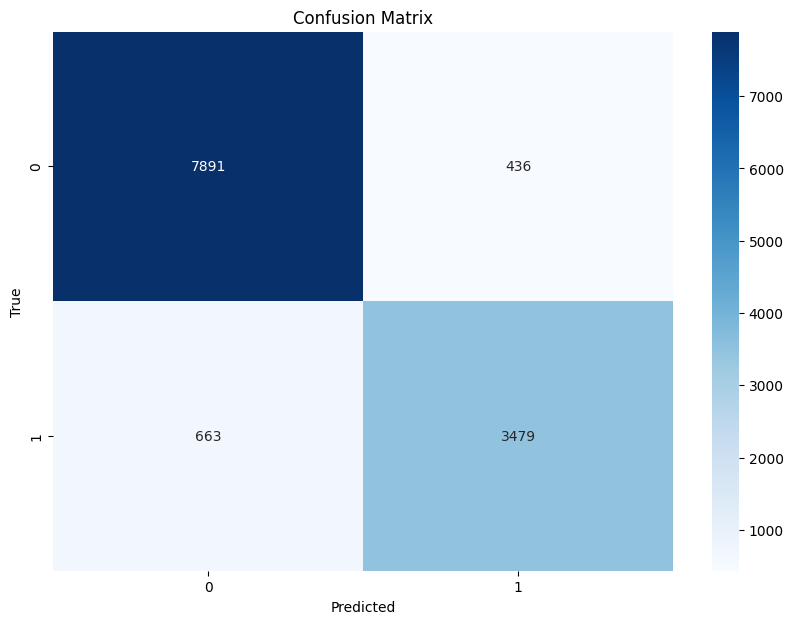

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [36]:
report = classification_report(y_test_true, y_pred, output_dict=True)
accuracy = report['accuracy']

print("Classes:")
for label, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"\n{label}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")

print(f"\nAccuracy: {accuracy:.4f}")

Classes:

0:
precision: 0.9225
recall: 0.9476
f1-score: 0.9349
support: 8327.0000

1:
precision: 0.8886
recall: 0.8399
f1-score: 0.8636
support: 4142.0000

macro avg:
precision: 0.9056
recall: 0.8938
f1-score: 0.8992
support: 12469.0000

weighted avg:
precision: 0.9112
recall: 0.9119
f1-score: 0.9112
support: 12469.0000

Accuracy: 0.9119


In [30]:
results_df = pd.DataFrame({
    'true_label': y_test_true,
    'predicted_label': y_pred,
    'text': X_test.tolist()  # original text if you want to analyze examples
})

print("\nSample of predictions:")
print(results_df.head())


Sample of predictions:
   true_label  predicted_label  \
0           1                0   
1           0                0   
2           1                1   
3           1                1   
4           0                0   

                                                text  
0  capek ke tps terus antri buat mencoblos dinama...  
1  kok ke mk juga sih emang kenapa merasa di cura...  
2  diluar issue yang berkembang kecurangan sampai...  
3  pernyataan ini membantah dan berpotensi mereda...  
4  saya tidak mau punya presiden dari proses pemi...  
